### k-means model
- Get optimal # of clusters, Run k-means model on all features, get initial cluster assignments, EDA on clusters to characterize them. 
- Business Customer Segment Discovered. 
- Removed Business Customer Segment data from dataset to understand how the retail segments would further cluster. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn import metrics 

#scipy
from scipy.spatial.distance import cdist
from scipy import stats

#yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

In [2]:
data = pd.read_csv('/Users/jennihawk/Documents/Data Science3/Clustering Project/df_to_model.csv')
data

,CustomerID,Annual_Spend,Num_Orders,Unique_Month,Num_Unique_Stock,Sum_Qty
0,12747.0,3489.74,88,8,39,1062
1,12748.0,34088.78,3972,12,1603,24439
2,12749.0,4313.56,231,4,160,1520
3,12820.0,942.34,59,4,55,722
4,12821.0,92.72,6,1,6,70
...,...,...,...,...,...,...
3404,18278.0,173.90,9,1,9,66
3405,18281.0,80.82,7,1,7,54
3406,18282.0,179.50,13,2,12,108
3407,18283.0,2094.88,756,10,263,1397


In [3]:
data['CustomerID'] = data['CustomerID'].astype(str)

### Standardize Data

In [4]:
data.columns

Index(['CustomerID', 'Annual_Spend', 'Num_Orders', 'Unique_Month',
       'Num_Unique_Stock', 'Sum_Qty'],
      dtype='object')

In [5]:
# the scaler object (model)
scaler = StandardScaler()

#### Place outputs of the standardization back into the dataframe rather than have an indpendent array

In [6]:
# Create new columns for the standardized output                                              #implement scaler on desired columns
data[['Annual_Spend_T', 'Num_Orders_T', 'Unique_Month_T','Num_Unique_Stock_T', 'Sum_Qty_T']] = scaler.fit_transform(data[['Annual_Spend', 'Num_Orders', 'Unique_Month',
       'Num_Unique_Stock', 'Sum_Qty']])

In [7]:
data.head()

,CustomerID,Annual_Spend,Num_Orders,Unique_Month,Num_Unique_Stock,Sum_Qty,Annual_Spend_T,Num_Orders_T,Unique_Month_T,Num_Unique_Stock_T,Sum_Qty_T
0,12747.0,3489.74,88,8,39,1062,0.163544,-0.038309,1.869130,-0.306928,-0.015164
1,12748.0,34088.78,3972,12,1603,24439,3.510478,17.419164,3.418237,18.892000,5.437813
2,12749.0,4313.56,231,4,160,1520,0.253654,0.604436,0.320023,1.178411,0.091670
3,12820.0,942.34,59,4,55,722,-0.115092,-0.168655,0.320023,-0.110519,-0.094474
4,12821.0,92.72,6,1,6,70,-0.208023,-0.406875,-0.841807,-0.712020,-0.246561


In [8]:
data = data.set_index('CustomerID')

In [51]:
data.describe()

,Annual_Spend,Num_Orders,Unique_Month,Num_Unique_Stock,Sum_Qty,Annual_Spend_T,Num_Orders_T,Unique_Month_T,Num_Unique_Stock_T,Sum_Qty_T,Cluster_Num
count,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3.409000e+03,3.409000e+03,3.409000e+03,3.409000e+03,3.409000e+03,3409.000000
mean,1994.555009,96.523027,3.173658,64.003227,1127.010267,1.903158e-17,1.178126e-17,1.556559e-16,2.064163e-17,2.491407e-18,0.003813
std,9143.751029,222.516163,2.582511,81.474832,4287.644841,1.000147e+00,1.000147e+00,1.000147e+00,1.000147e+00,1.000147e+00,0.061644
min,43.200000,2.000000,1.000000,1.000000,13.000000,-2.134399e-01,-4.248541e-01,-8.418073e-01,-7.733980e-01,-2.598568e-01,0.000000
25%,330.110000,21.000000,1.000000,18.000000,185.000000,-1.820576e-01,-3.394545e-01,-8.418073e-01,-5.647140e-01,-2.197357e-01,0.000000
50%,716.570000,46.000000,2.000000,39.000000,416.000000,-1.397864e-01,-2.270866e-01,-4.545305e-01,-3.069278e-01,-1.658520e-01,0.000000
75%,1698.940000,107.000000,4.000000,80.000000,1002.000000,-3.233447e-02,4.709100e-02,3.200231e-01,1.963689e-01,-2.916021e-02,0.000000
max,336942.100000,7692.000000,12.000000,1603.000000,161992.000000,3.663668e+01,3.413950e+01,3.418237e+00,1.889200e+01,3.752377e+01,1.000000


In [10]:
data.head()

,Annual_Spend,Num_Orders,Unique_Month,Num_Unique_Stock,Sum_Qty,Annual_Spend_T,Num_Orders_T,Unique_Month_T,Num_Unique_Stock_T,Sum_Qty_T
CustomerID,,,,,,,,,,
12747.0,3489.74,88,8,39,1062,0.163544,-0.038309,1.869130,-0.306928,-0.015164
12748.0,34088.78,3972,12,1603,24439,3.510478,17.419164,3.418237,18.892000,5.437813
12749.0,4313.56,231,4,160,1520,0.253654,0.604436,0.320023,1.178411,0.091670
12820.0,942.34,59,4,55,722,-0.115092,-0.168655,0.320023,-0.110519,-0.094474
12821.0,92.72,6,1,6,70,-0.208023,-0.406875,-0.841807,-0.712020,-0.246561


### Define Optimal Number of Clusters

#### Elbow

In [11]:
def elbow_function (data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
    
    #Generate the elbow plot
    fig = plt.subplots(figsize = (10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()
    

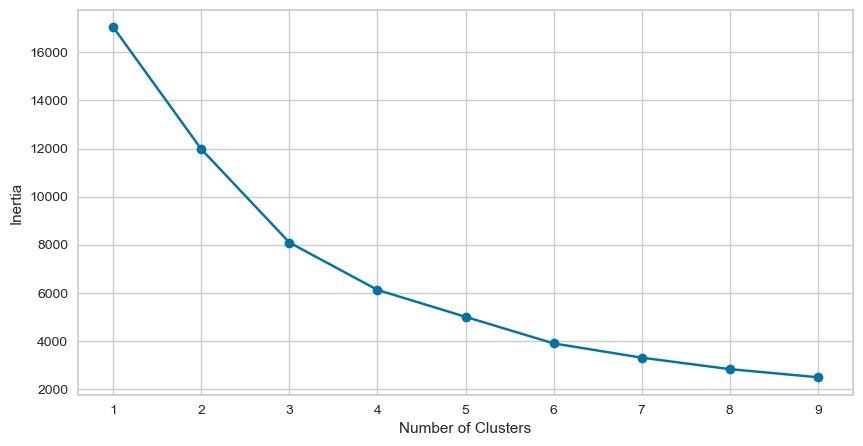

In [12]:
elbow_function(data[['Annual_Spend_T', 'Num_Orders_T', 'Unique_Month_T','Num_Unique_Stock_T', 'Sum_Qty_T']], 10)

### Silhouette Scores

In [13]:
# Calculate Silhouette coefficient
for n_cluster in [2, 3, 4, 5, 6, 7, 8, 9]:
    kmeans = KMeans(n_clusters=n_cluster,
                    max_iter=400,
                    n_init=20).fit(data[['Annual_Spend_T', 
                                         'Num_Orders_T', 
                                         'Unique_Month_T',
                                         'Num_Unique_Stock_T', 
                                         'Sum_Qty_T']])
    
    silhouette_avg = silhouette_score(data[['Annual_Spend_T', 
                                            'Num_Orders_T', 
                                            'Unique_Month_T',
                                            'Num_Unique_Stock_T', 
                                            'Sum_Qty_T']],
                                      kmeans.labels_) 
    
    print('Silhouette coefficient for %i clusters: %0.3f' % (n_cluster,
                                                             silhouette_avg))

Silhouette coefficient for 2 clusters: 0.927
Silhouette coefficient for 3 clusters: 0.613
Silhouette coefficient for 4 clusters: 0.614
Silhouette coefficient for 5 clusters: 0.614
Silhouette coefficient for 6 clusters: 0.510
Silhouette coefficient for 7 clusters: 0.484
Silhouette coefficient for 8 clusters: 0.485
Silhouette coefficient for 9 clusters: 0.464


### Variable that contains transformed data

In [14]:
X = data[['Annual_Spend_T', 'Num_Orders_T', 'Unique_Month_T','Num_Unique_Stock_T', 'Sum_Qty_T']]

#### Silhouette Plot with 2 clusters

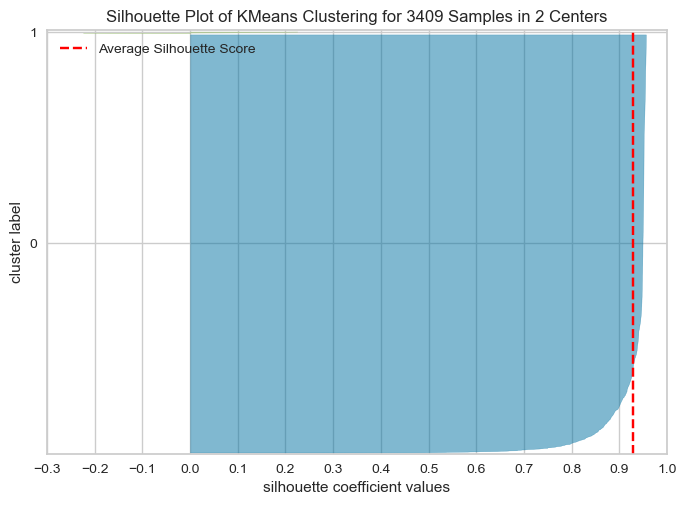

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3409 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [15]:
# Instantiate the clustering model and visualizer
model_k2 = KMeans(2, random_state=42)
visualizer = SilhouetteVisualizer(model_k2, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#### Silhouette Plot with 3 clusters
- We can see this doesn't work
- Cluster 1 has tail going left which menas it's clsoer other cluster than its own cluster

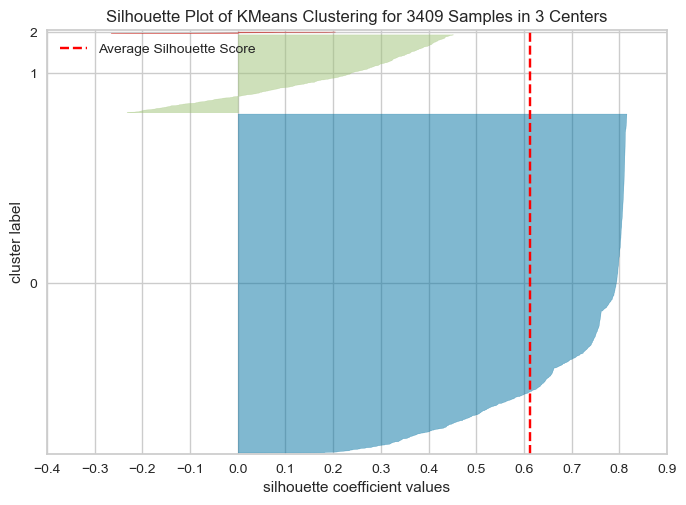

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3409 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [16]:
# Instantiate the clustering model and visualizer
model_k_3 = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model_k_3, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Build k-means clustering model with finalized k-value

In [17]:
kmeans = KMeans(n_clusters=2,
                 max_iter=400,
                 n_init=20).fit(X)

#### Assign cluster labels to dataframe

In [18]:
data['Cluster_Num'] = kmeans.labels_

In [19]:
data

,Annual_Spend,Num_Orders,Unique_Month,Num_Unique_Stock,Sum_Qty,Annual_Spend_T,Num_Orders_T,Unique_Month_T,Num_Unique_Stock_T,Sum_Qty_T,Cluster_Num
CustomerID,,,,,,,,,,,
12747.0,3489.74,88,8,39,1062,0.163544,-0.038309,1.869130,-0.306928,-0.015164,0
12748.0,34088.78,3972,12,1603,24439,3.510478,17.419164,3.418237,18.892000,5.437813,1
12749.0,4313.56,231,4,160,1520,0.253654,0.604436,0.320023,1.178411,0.091670,0
12820.0,942.34,59,4,55,722,-0.115092,-0.168655,0.320023,-0.110519,-0.094474,0
12821.0,92.72,6,1,6,70,-0.208023,-0.406875,-0.841807,-0.712020,-0.246561,0
...,...,...,...,...,...,...,...,...,...,...,...
18278.0,173.90,9,1,9,66,-0.199144,-0.393391,-0.841807,-0.675194,-0.247494,0
18281.0,80.82,7,1,7,54,-0.209325,-0.402380,-0.841807,-0.699745,-0.250293,0
18282.0,179.50,13,2,12,108,-0.198531,-0.375412,-0.454530,-0.638367,-0.237697,0


In [21]:
#data.describe()

data['Cluster_Num'].value_counts()

0    3396
1      13
Name: Cluster_Num, dtype: int64

In [22]:
filt = data['Cluster_Num'] == 1

In [23]:
data[filt]

,Annual_Spend,Num_Orders,Unique_Month,Num_Unique_Stock,Sum_Qty,Annual_Spend_T,Num_Orders_T,Unique_Month_T,Num_Unique_Stock_T,Sum_Qty_T,Cluster_Num
CustomerID,,,,,,,,,,,
12748.0,34088.78,3972,12,1603,24439,3.510478,17.419164,3.418237,18.892000,5.437813,1
13089.0,54192.57,1767,12,623,28750,5.709437,7.508318,3.418237,6.861981,6.443407,1
13694.0,64517.10,538,12,342,60945,6.838738,1.984313,3.418237,3.412558,13.953293,1
14096.0,73208.67,5128,5,1121,16369,7.789425,22.615054,0.707300,12.975195,3.555384,1
14298.0,47502.70,1495,12,847,53689,4.977697,6.285755,3.418237,9.611700,12.260740,1
15311.0,59372.35,2297,12,542,37471,6.276003,9.890517,3.418237,5.867664,8.477689,1
16029.0,97944.55,242,11,45,40312,10.495044,0.653878,3.030961,-0.233275,9.140388,1
16446.0,336942.10,4,2,3,161992,36.636680,-0.415865,-0.454530,-0.748847,37.523768,1
16684.0,64301.64,258,9,117,49772,6.815171,0.725793,2.256407,0.650563,11.347051,1


#### Plot Results

#### What's the relationship between Annual Spend and Number of Orders for Cluster 0 versus Cluster 1?

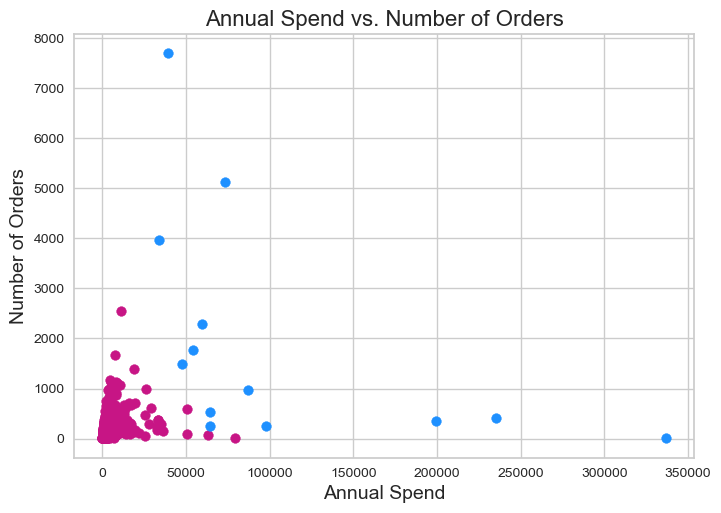

In [24]:
plt.scatter(data.loc[data['Cluster_Num'] == 0]['Annual_Spend'], 
            data.loc[data['Cluster_Num'] == 0]['Num_Orders'],
            c='mediumvioletred')

plt.scatter(data.loc[data['Cluster_Num'] == 1]['Annual_Spend'], 
            data.loc[data['Cluster_Num'] == 1]['Num_Orders'],
            c='dodgerblue')

plt.title('Annual Spend vs. Number of Orders', fontsize=16)
plt.xlabel('Annual Spend', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14);
#plt.savefig('NumOrders_vs_Spend.png')

#### What role does annual spend have to number of months ordered?

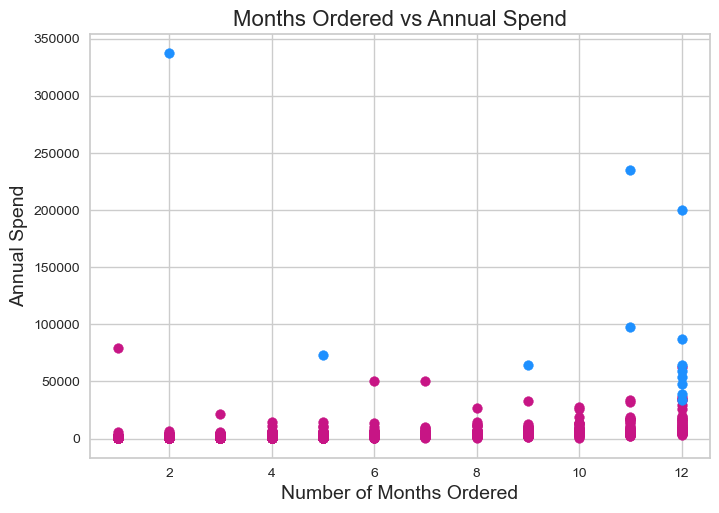

In [25]:
plt.scatter(data.loc[data['Cluster_Num'] == 0]['Unique_Month'], 
            data.loc[data['Cluster_Num'] == 0]['Annual_Spend'],
            c='mediumvioletred')

plt.scatter(data.loc[data['Cluster_Num'] == 1]['Unique_Month'], 
            data.loc[data['Cluster_Num'] == 1]['Annual_Spend'],
            c='dodgerblue')

plt.title('Months Ordered vs Annual Spend', fontsize=16)
plt.xlabel('Number of Months Ordered', fontsize=14)
plt.ylabel('Annual Spend', fontsize=14);
#plt.savefig('MonthsOrd_vs_AnnualSpend.png')

#### Role of Spending and Number of Unique Product Codes purchased

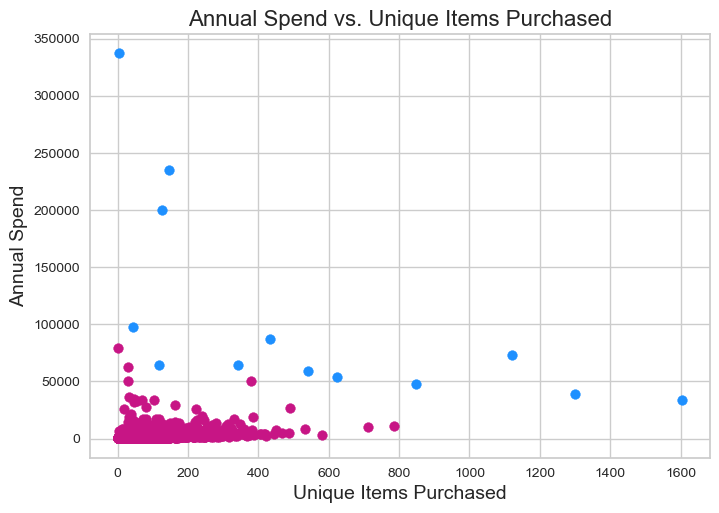

In [26]:
plt.scatter(data.loc[data['Cluster_Num'] == 0]['Num_Unique_Stock'], 
            data.loc[data['Cluster_Num'] == 0]['Annual_Spend'],
            c='mediumvioletred')

plt.scatter(data.loc[data['Cluster_Num'] == 1]['Num_Unique_Stock'], 
            data.loc[data['Cluster_Num'] == 1]['Annual_Spend'],
            c='dodgerblue')

plt.title('Annual Spend vs. Unique Items Purchased', fontsize=16)
plt.xlabel('Unique Items Purchased', fontsize=14)
plt.ylabel('Annual Spend', fontsize=14);
#plt.savefig('Spend_vs_Unique_Items.png')

#### Annual Spend vs Qty Items Purchased

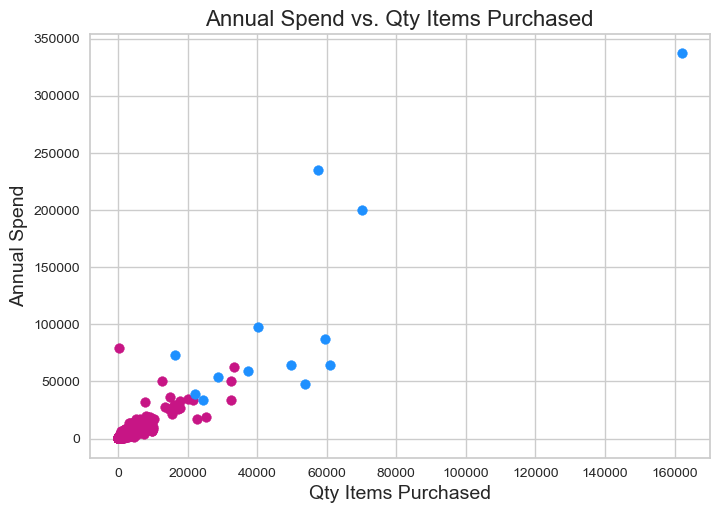

In [27]:
plt.scatter(data.loc[data['Cluster_Num'] == 0]['Sum_Qty'], 
            data.loc[data['Cluster_Num'] == 0]['Annual_Spend'],
            c='mediumvioletred')

plt.scatter(data.loc[data['Cluster_Num'] == 1]['Sum_Qty'], 
            data.loc[data['Cluster_Num'] == 1]['Annual_Spend'],
            c='dodgerblue')

plt.title('Annual Spend vs. Qty Items Purchased', fontsize=16)
plt.xlabel('Qty Items Purchased', fontsize=14)
plt.ylabel('Annual Spend', fontsize=14);
#plt.savefig('Spend_vs_Qty.png')

In [28]:
# df_new = Dataframe.loc[(Dataframe['goals_per_90_overall'] > .5)]
# filtered_df = df.loc[df['Symbol'] == 'A99']

### Business Buyers Dataframe

In [29]:
#filt = data['Cluster_Num'] == 1
# df_new = Dataframe.loc[(Dataframe['goals_per_90_overall'] > .5)]
biz_buyers = data.loc[(data['Cluster_Num'] == 1)]

In [30]:
biz_buyers

,Annual_Spend,Num_Orders,Unique_Month,Num_Unique_Stock,Sum_Qty,Annual_Spend_T,Num_Orders_T,Unique_Month_T,Num_Unique_Stock_T,Sum_Qty_T,Cluster_Num
CustomerID,,,,,,,,,,,
12748.0,34088.78,3972,12,1603,24439,3.510478,17.419164,3.418237,18.892000,5.437813,1
13089.0,54192.57,1767,12,623,28750,5.709437,7.508318,3.418237,6.861981,6.443407,1
13694.0,64517.10,538,12,342,60945,6.838738,1.984313,3.418237,3.412558,13.953293,1
14096.0,73208.67,5128,5,1121,16369,7.789425,22.615054,0.707300,12.975195,3.555384,1
14298.0,47502.70,1495,12,847,53689,4.977697,6.285755,3.418237,9.611700,12.260740,1
15311.0,59372.35,2297,12,542,37471,6.276003,9.890517,3.418237,5.867664,8.477689,1
16029.0,97944.55,242,11,45,40312,10.495044,0.653878,3.030961,-0.233275,9.140388,1
16446.0,336942.10,4,2,3,161992,36.636680,-0.415865,-0.454530,-0.748847,37.523768,1
16684.0,64301.64,258,9,117,49772,6.815171,0.725793,2.256407,0.650563,11.347051,1


In [31]:
biz_buyers.describe()

,Annual_Spend,Num_Orders,Unique_Month,Num_Unique_Stock,Sum_Qty,Annual_Spend_T,Num_Orders_T,Unique_Month_T,Num_Unique_Stock_T,Sum_Qty_T,Cluster_Num
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0
mean,107159.561538,1933.076923,10.307692,557.692308,52554.000000,11.502985,8.254786,2.762846,6.060295,11.995988,1.0
std,92014.189074,2326.512499,3.198557,518.874645,36973.537361,10.064544,10.457010,1.238727,6.369461,8.624539,0.0
min,34088.780000,4.000000,2.000000,3.000000,16369.000000,3.510478,-0.415865,-0.454530,-0.748847,3.555384,1.0
25%,54192.570000,348.000000,11.000000,127.000000,28750.000000,5.709437,1.130317,3.030961,0.773319,6.443407,1.0
50%,64517.100000,974.000000,12.000000,434.000000,49772.000000,6.838738,3.944009,3.418237,4.541906,11.347051,1.0
75%,97944.550000,2297.000000,12.000000,847.000000,59642.000000,10.495044,9.890517,3.418237,9.611700,13.649352,1.0
max,336942.100000,7692.000000,12.000000,1603.000000,161992.000000,36.636680,34.139503,3.418237,18.892000,37.523768,1.0


<AxesSubplot:xlabel='Cluster_Num', ylabel='Unique_Month'>

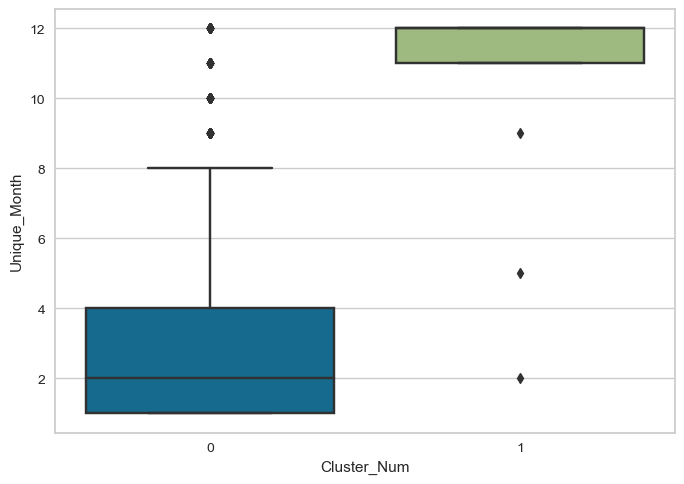

In [32]:
#biz buyers very regular buyers
sns.boxplot(data=data, x = 'Cluster_Num', y = 'Unique_Month')

In [33]:
data.columns

Index(['Annual_Spend', 'Num_Orders', 'Unique_Month', 'Num_Unique_Stock',
       'Sum_Qty', 'Annual_Spend_T', 'Num_Orders_T', 'Unique_Month_T',
       'Num_Unique_Stock_T', 'Sum_Qty_T', 'Cluster_Num'],
      dtype='object')

### Create Retail Dataframe

In [34]:
retail_df = data[data['Cluster_Num'] == 0]

In [35]:
#retail_df

In [36]:
retail_df[['Annual_Spend_T', 'Num_Orders_T', 'Unique_Month_T','Num_Unique_Stock_T', 'Sum_Qty_T']] = scaler.fit_transform(retail_df[['Annual_Spend', 'Num_Orders', 'Unique_Month',
       'Num_Unique_Stock', 'Sum_Qty']])

/var/folders/j0/364009cj7xnbq46wqpdh5v9m0000gn/T/ipykernel_42029/1815294993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df[['Annual_Spend_T', 'Num_Orders_T', 'Unique_Month_T','Num_Unique_Stock_T', 'Sum_Qty_T']] = scaler.fit_transform(retail_df[['Annual_Spend', 'Num_Orders', 'Unique_Month',


In [37]:
retail_df

,Annual_Spend,Num_Orders,Unique_Month,Num_Unique_Stock,Sum_Qty,Annual_Spend_T,Num_Orders_T,Unique_Month_T,Num_Unique_Stock_T,Sum_Qty_T,Cluster_Num
CustomerID,,,,,,,,,,,
12747.0,3489.74,88,8,39,1062,0.559926,-0.011251,1.909465,-0.334531,0.070932,0
12749.0,4313.56,231,4,160,1520,0.802991,1.066613,0.335833,1.416761,0.317317,0
12820.0,942.34,59,4,55,722,-0.191674,-0.229839,0.335833,-0.102955,-0.111974,0
12821.0,92.72,6,1,6,70,-0.442350,-0.629327,-0.844391,-0.812156,-0.462723,0
12822.0,978.78,47,1,41,552,-0.180922,-0.320289,-0.844391,-0.305584,-0.203427,0
...,...,...,...,...,...,...,...,...,...,...,...
18278.0,173.90,9,1,9,66,-0.418399,-0.606714,-0.844391,-0.768736,-0.464875,0
18281.0,80.82,7,1,7,54,-0.445861,-0.621789,-0.844391,-0.797683,-0.471330,0
18282.0,179.50,13,2,12,108,-0.416746,-0.576564,-0.450983,-0.725315,-0.442281,0


In [38]:
retail_df.describe()

,Annual_Spend,Num_Orders,Unique_Month,Num_Unique_Stock,Sum_Qty,Annual_Spend_T,Num_Orders_T,Unique_Month_T,Num_Unique_Stock_T,Sum_Qty_T,Cluster_Num
count,3396.000000,3396.000000,3396.000000,3396.000000,3396.000000,3.396000e+03,3.396000e+03,3.396000e+03,3.396000e+03,3.396000e+03,3396.0
mean,1591.979895,89.492638,3.146349,62.113369,930.146054,8.322995e-17,-3.063248e-17,4.336604e-17,-5.273641e-18,-2.525463e-17,0.0
std,3389.803433,132.689349,2.542265,69.102032,1859.152695,1.000147e+00,1.000147e+00,1.000147e+00,1.000147e+00,1.000147e+00,0.0
min,43.200000,2.000000,1.000000,1.000000,13.000000,-4.569610e-01,-6.594766e-01,-8.443906e-01,-8.845235e-01,-4.933866e-01,0.0
25%,329.660000,20.750000,1.000000,18.000000,185.000000,-3.724422e-01,-5.181483e-01,-8.443906e-01,-6.384742e-01,-4.008578e-01,0.0
50%,712.265000,46.000000,2.000000,39.000000,412.500000,-2.595562e-01,-3.278262e-01,-4.509827e-01,-3.345310e-01,-2.784722e-01,0.0
75%,1661.950000,105.000000,4.000000,80.000000,996.000000,2.064439e-02,1.168869e-01,3.358332e-01,2.588819e-01,3.542670e-02,0.0
max,79183.500000,2550.000000,12.000000,786.000000,33401.000000,2.289305e+01,1.854610e+01,3.483097e+00,1.047716e+01,1.746798e+01,0.0


<AxesSubplot:>

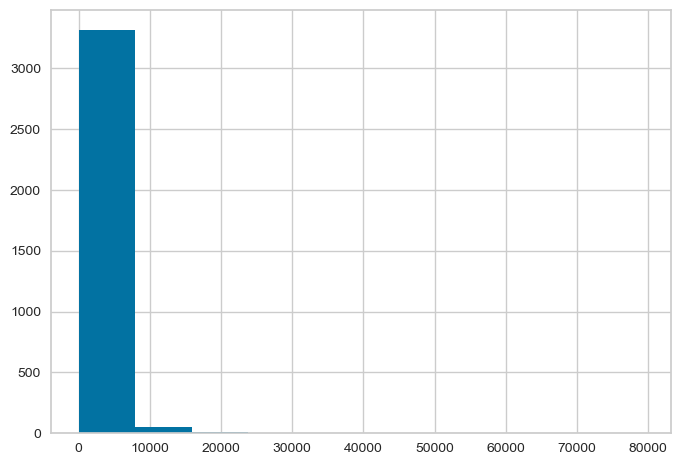

In [39]:
retail_df.Annual_Spend.hist()

In [40]:
for n_cluster in [2, 3, 4, 5, 6, 7, 8, 9]:
    kmeans = KMeans(n_clusters=n_cluster,
                    max_iter=400,
                    n_init=20).fit(retail_df[['Annual_Spend_T', 
                                         'Num_Orders_T', 
                                         'Unique_Month_T',
                                         'Num_Unique_Stock_T', 
                                         'Sum_Qty_T']])
    
    silhouette_avg = silhouette_score(retail_df[['Annual_Spend_T', 
                                            'Num_Orders_T', 
                                            'Unique_Month_T',
                                            'Num_Unique_Stock_T', 
                                            'Sum_Qty_T']],
                                      kmeans.labels_) 
    
    print('Silhouette coefficient for %i clusters: %0.3f' % (n_cluster,
                                                             silhouette_avg))

Silhouette coefficient for 2 clusters: 0.665
Silhouette coefficient for 3 clusters: 0.638
Silhouette coefficient for 4 clusters: 0.526
Silhouette coefficient for 5 clusters: 0.476
Silhouette coefficient for 6 clusters: 0.481
Silhouette coefficient for 7 clusters: 0.466
Silhouette coefficient for 8 clusters: 0.427
Silhouette coefficient for 9 clusters: 0.425


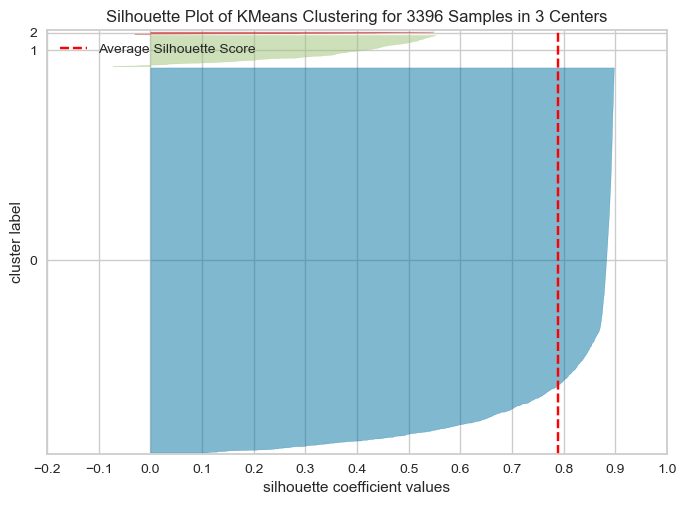

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3396 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [41]:
model_k_3 = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model_k_3, colors='yellowbrick')

visualizer.fit(retail_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [42]:
retail_df['Cluster_Num'] = model_k_3.labels_

/var/folders/j0/364009cj7xnbq46wqpdh5v9m0000gn/T/ipykernel_42029/2875938674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df['Cluster_Num'] = model_k_3.labels_


In [43]:
retail_df

,Annual_Spend,Num_Orders,Unique_Month,Num_Unique_Stock,Sum_Qty,Annual_Spend_T,Num_Orders_T,Unique_Month_T,Num_Unique_Stock_T,Sum_Qty_T,Cluster_Num
CustomerID,,,,,,,,,,,
12747.0,3489.74,88,8,39,1062,0.559926,-0.011251,1.909465,-0.334531,0.070932,0
12749.0,4313.56,231,4,160,1520,0.802991,1.066613,0.335833,1.416761,0.317317,0
12820.0,942.34,59,4,55,722,-0.191674,-0.229839,0.335833,-0.102955,-0.111974,0
12821.0,92.72,6,1,6,70,-0.442350,-0.629327,-0.844391,-0.812156,-0.462723,0
12822.0,978.78,47,1,41,552,-0.180922,-0.320289,-0.844391,-0.305584,-0.203427,0
...,...,...,...,...,...,...,...,...,...,...,...
18278.0,173.90,9,1,9,66,-0.418399,-0.606714,-0.844391,-0.768736,-0.464875,0
18281.0,80.82,7,1,7,54,-0.445861,-0.621789,-0.844391,-0.797683,-0.471330,0
18282.0,179.50,13,2,12,108,-0.416746,-0.576564,-0.450983,-0.725315,-0.442281,0


In [44]:
retail_df.describe()

,Annual_Spend,Num_Orders,Unique_Month,Num_Unique_Stock,Sum_Qty,Annual_Spend_T,Num_Orders_T,Unique_Month_T,Num_Unique_Stock_T,Sum_Qty_T,Cluster_Num
count,3396.000000,3396.000000,3396.000000,3396.000000,3396.000000,3.396000e+03,3.396000e+03,3.396000e+03,3.396000e+03,3.396000e+03,3396.000000
mean,1591.979895,89.492638,3.146349,62.113369,930.146054,8.322995e-17,-3.063248e-17,4.336604e-17,-5.273641e-18,-2.525463e-17,0.085100
std,3389.803433,132.689349,2.542265,69.102032,1859.152695,1.000147e+00,1.000147e+00,1.000147e+00,1.000147e+00,1.000147e+00,0.297464
min,43.200000,2.000000,1.000000,1.000000,13.000000,-4.569610e-01,-6.594766e-01,-8.443906e-01,-8.845235e-01,-4.933866e-01,0.000000
25%,329.660000,20.750000,1.000000,18.000000,185.000000,-3.724422e-01,-5.181483e-01,-8.443906e-01,-6.384742e-01,-4.008578e-01,0.000000
50%,712.265000,46.000000,2.000000,39.000000,412.500000,-2.595562e-01,-3.278262e-01,-4.509827e-01,-3.345310e-01,-2.784722e-01,0.000000
75%,1661.950000,105.000000,4.000000,80.000000,996.000000,2.064439e-02,1.168869e-01,3.358332e-01,2.588819e-01,3.542670e-02,0.000000
max,79183.500000,2550.000000,12.000000,786.000000,33401.000000,2.289305e+01,1.854610e+01,3.483097e+00,1.047716e+01,1.746798e+01,2.000000


<AxesSubplot:xlabel='Cluster_Num', ylabel='Unique_Month'>

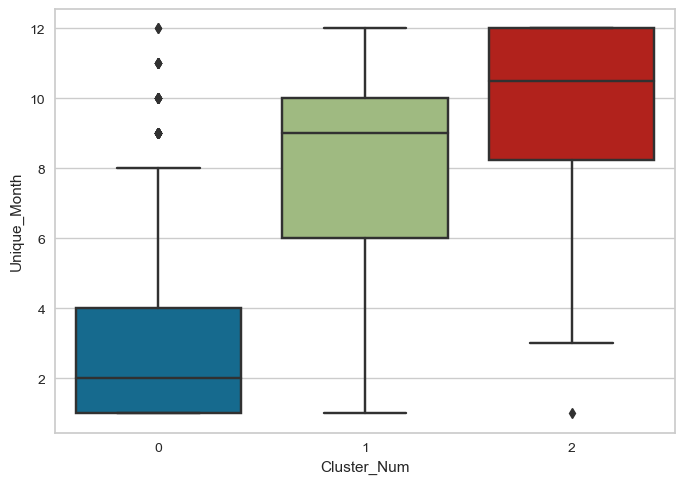

In [45]:
#unique month is a driver
sns.boxplot(data=retail_df, x = 'Cluster_Num', y = 'Unique_Month')

<AxesSubplot:xlabel='Cluster_Num', ylabel='Annual_Spend'>

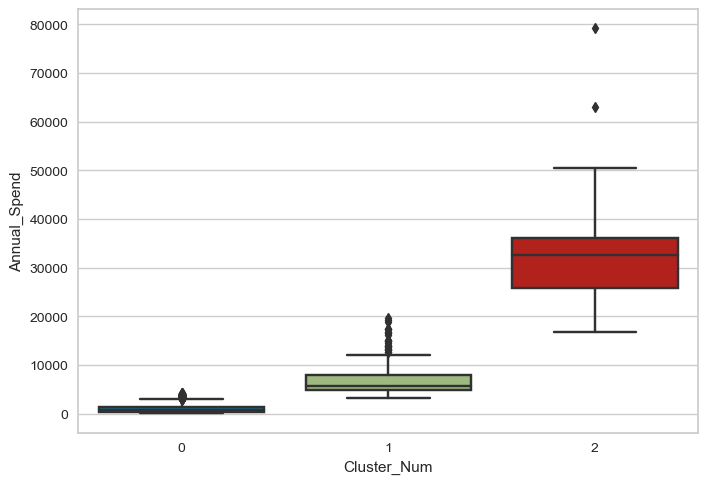

In [46]:
sns.boxplot(data=retail_df, x = 'Cluster_Num', y = 'Annual_Spend')

In [47]:
#do correlation heat map

<AxesSubplot:>

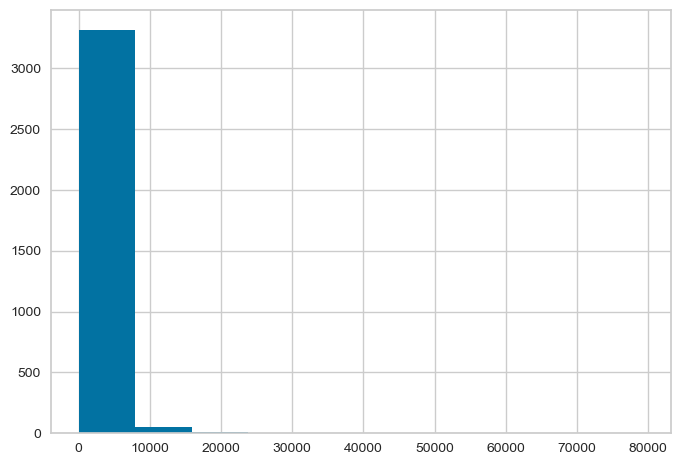

In [48]:
retail_df.Annual_Spend.hist()

<AxesSubplot:>

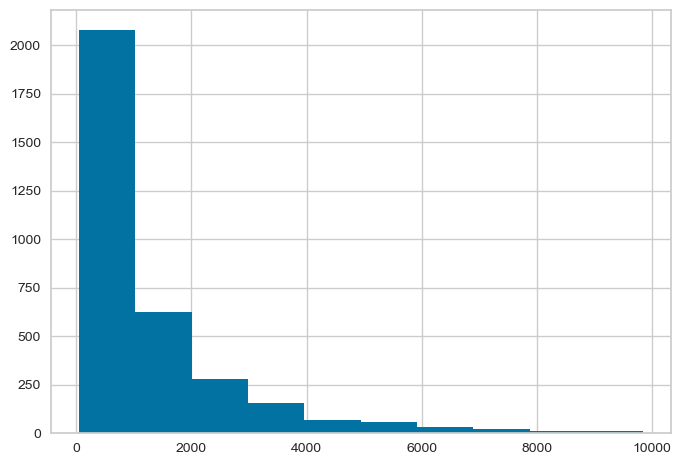

In [49]:
# a lot of people that don't spend a lot of money
retail_df[retail_df.Annual_Spend < 10000].Annual_Spend.hist()